In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('data/processed/crypto_data.db')
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)
print("Tables disponibles :")
print(tables)
print('-'*45)

# Afficher les premières lignes de chaque table
for table in tables['name']:
    print(f"\nContenu de la table '{table}':")
    query = f"SELECT * FROM {table} LIMIT 5"
    df_sample = pd.read_sql_query(query, conn)
    display(df_sample)
    
    # Afficher les colonnes
    print(f"Colonnes : {list(df_sample.columns)}")
    print(f"Nombre de lignes total : {pd.read_sql_query(f'SELECT COUNT(*) FROM {table}', conn).iloc[0,0]}")


Tables disponibles :
               name
0             ohlcv
1  ticker_snapshots
---------------------------------------------

Contenu de la table 'ohlcv':


,id,timestamp,symbol,timeframe,open,high,low,close,volume,price_range,price_change,price_change_pct,date,exchange,created_at,updated_at
0,1bcd5a3d-fb07-4c3f-86c6-68ebd670f445,2026-01-21 13:00:00.000000,BTC/USDT,1h,88736.31,89020.32,88558.67,88672.64,735.83253,461.65,-63.67,-0.071752,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332
1,82309099-d054-4715-b08a-f4cdb9579a14,2026-01-21 14:00:00.000000,BTC/USDT,1h,88672.64,89993.88,88611.15,89805.43,1602.75733,1382.73,1132.79,1.277497,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332
2,e7a504f5-1a4f-47dd-a94d-c9eb8ae140d1,2026-01-21 15:00:00.000000,BTC/USDT,1h,89805.43,90574.00,89759.59,90288.04,1074.26054,814.41,482.61,0.537395,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332
3,4e984f08-44c8-4efd-bbfa-4031ee8faba9,2026-01-21 16:00:00.000000,BTC/USDT,1h,90288.04,90360.00,87590.00,87602.40,2075.92566,2770.00,-2685.64,-2.974525,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332
4,7e3beca0-a947-4979-be61-4be70f9aeaf7,2026-01-21 17:00:00.000000,BTC/USDT,1h,87602.39,88156.47,87263.53,87932.38,1818.07575,892.94,329.99,0.376691,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332


Colonnes : ['id', 'timestamp', 'symbol', 'timeframe', 'open', 'high', 'low', 'close', 'volume', 'price_range', 'price_change', 'price_change_pct', 'date', 'exchange', 'created_at', 'updated_at']
Nombre de lignes total : 1800

Contenu de la table 'ticker_snapshots':


,id,snapshot_time,symbol,exchange,price,volume_24h,price_change_24h,price_change_pct_24h,high_24h,low_24h,created_at
0,13e2ad9e-943e-4260-92e0-af111978347d,2026-01-25 16:14:54.637315,BTC/USDT,binance,87967.61,5.664120e+08,None,-1.397,None,None,None
1,eb6ec43f-67a2-48c7-b918-5e843e9f57a8,2026-01-25 16:14:54.644713,ETH/USDT,binance,2905.79,3.653700e+08,None,-1.710,None,None,None
2,92493ffd-a108-4444-a849-98de7e81dbbf,2026-01-25 16:14:54.644796,SOL/USDT,binance,122.80,1.776605e+08,None,-3.162,None,None,None
3,b8a36c1c-3634-4149-ba7e-581685bbed3a,2026-01-25 16:15:03.435909,BTC/USDT,binance,87890.01,5.671171e+08,None,-1.521,None,None,None
4,eda9baa3-82ad-4218-a8b0-e82ea3c1e387,2026-01-25 16:15:03.436225,ETH/USDT,binance,2901.01,3.696404e+08,None,-1.867,None,None,None


Colonnes : ['id', 'snapshot_time', 'symbol', 'exchange', 'price', 'volume_24h', 'price_change_24h', 'price_change_pct_24h', 'high_24h', 'low_24h', 'created_at']
Nombre de lignes total : 54


In [2]:
def get_table(name): 
  query = f"SELECT * FROM {name}"
  return pd.read_sql_query(query, conn)

ohlcv_data = get_table("ohlcv")
ohlcv_data.head()

,id,timestamp,symbol,timeframe,open,high,low,close,volume,price_range,price_change,price_change_pct,date,exchange,created_at,updated_at
0,1bcd5a3d-fb07-4c3f-86c6-68ebd670f445,2026-01-21 13:00:00.000000,BTC/USDT,1h,88736.31,89020.32,88558.67,88672.64,735.83253,461.65,-63.67,-0.071752,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332
1,82309099-d054-4715-b08a-f4cdb9579a14,2026-01-21 14:00:00.000000,BTC/USDT,1h,88672.64,89993.88,88611.15,89805.43,1602.75733,1382.73,1132.79,1.277497,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332
2,e7a504f5-1a4f-47dd-a94d-c9eb8ae140d1,2026-01-21 15:00:00.000000,BTC/USDT,1h,89805.43,90574.00,89759.59,90288.04,1074.26054,814.41,482.61,0.537395,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332
3,4e984f08-44c8-4efd-bbfa-4031ee8faba9,2026-01-21 16:00:00.000000,BTC/USDT,1h,90288.04,90360.00,87590.00,87602.40,2075.92566,2770.00,-2685.64,-2.974525,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332
4,7e3beca0-a947-4979-be61-4be70f9aeaf7,2026-01-21 17:00:00.000000,BTC/USDT,1h,87602.39,88156.47,87263.53,87932.38,1818.07575,892.94,329.99,0.376691,2026-01-21,binance,2026-01-25 16:07:34.015789,2026-01-25 16:07:34.016332


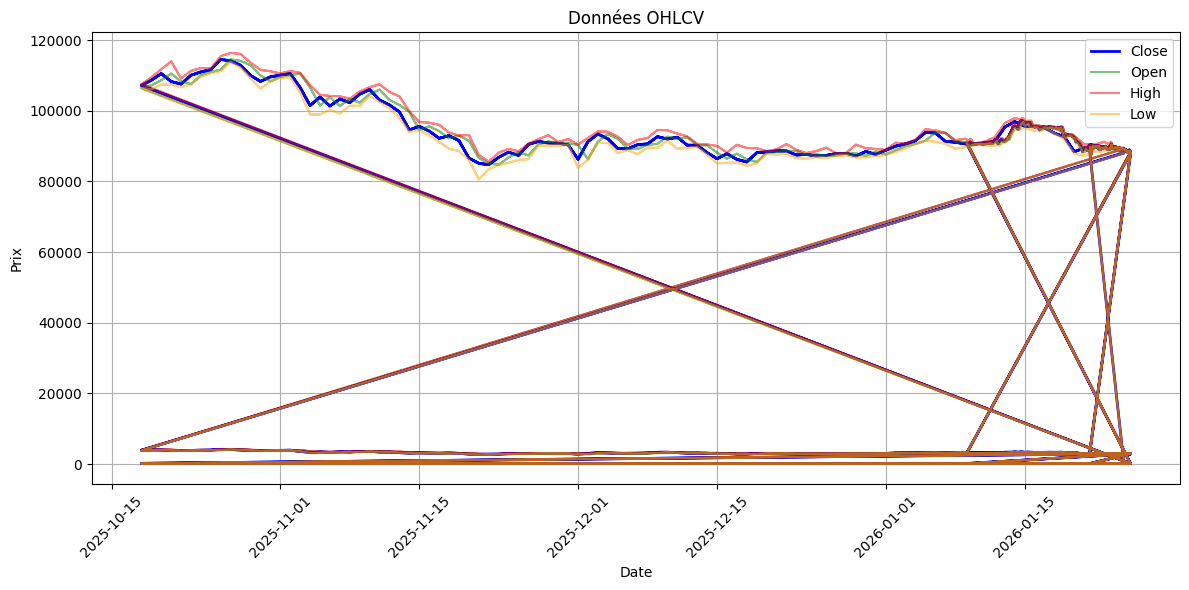

In [3]:
from src.analytics.visualization import plot_ohlcv_data

plot_ohlcv_data(ohlcv_data)

In [4]:
from src.analytics.indicators import calculate_sma

sma_serie = calculate_sma(ohlcv_data)


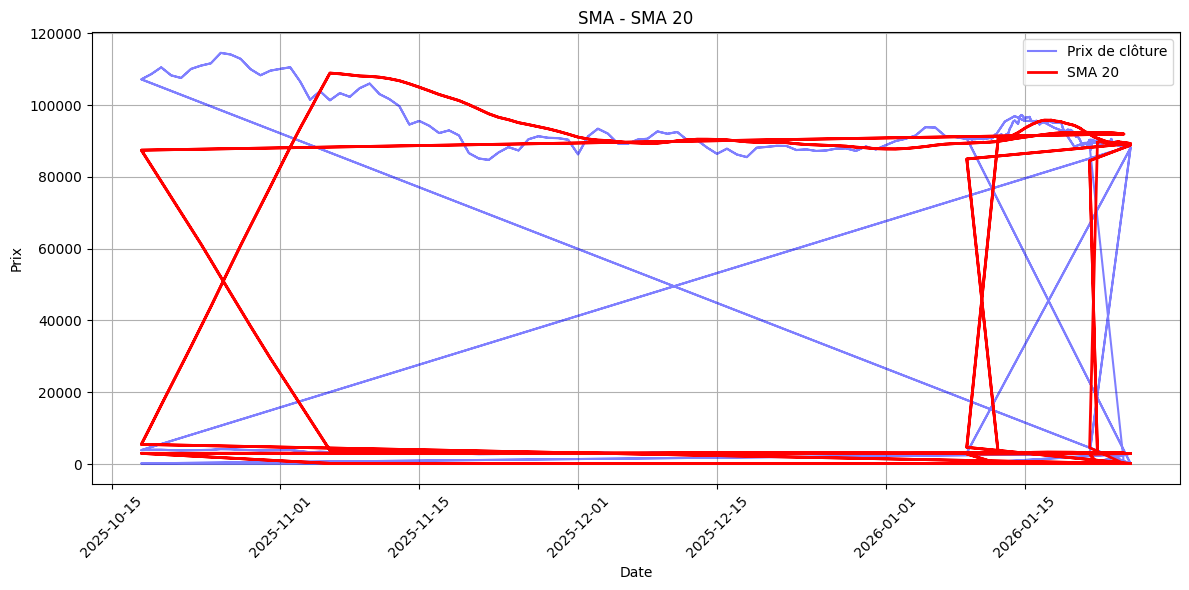

In [5]:
from src.analytics.visualization import plot_sma
plot_sma(ohlcv_data, sma_serie, 20)

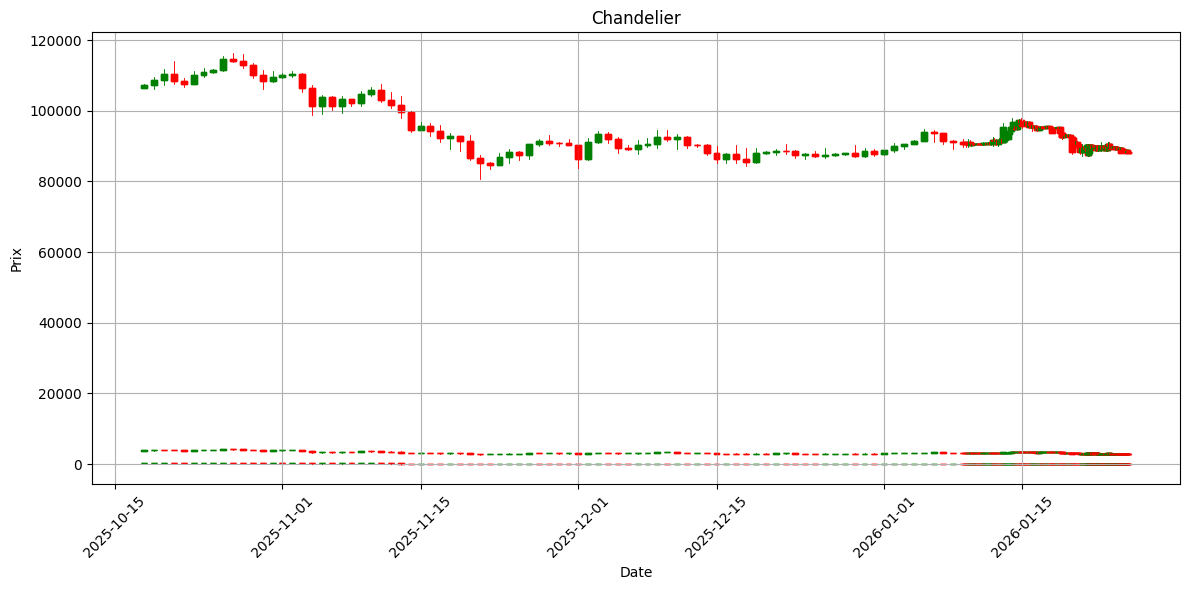

In [6]:
from src.analytics.visualization import plot_candlestick

plot_candlestick(ohlcv_data)